# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Zero-Padding

### Concept

Let's assume a signal $x_N[k]$ of finite length $N$, for instance a windowed signal $x_N[k] = x[k] \cdot \text{rect}_N[k]$. The discrete Fourier transformation (DFT) of $x_N[k]$ reads

\begin{equation}
X_N[\mu] = \sum_{k=0}^{N-1} x_N[k] \; w_N^{\mu k}
\end{equation}

where $w_N = \mathrm{e}^{-\mathrm{j} \frac{2 \pi}{N}}$ denotes the kernel of the DFT. For a sampled time-domain signal, the distance in frequency between two neighboring coefficients is given as $\Delta f = \frac{f_s}{N}$, where $f_s = \frac{1}{T}$ denotes the sampling frequency. Hence, if $N$ is increased the distance between neighboring frequencies is decreased. This leads to the concept of zero-padding in spectral analysis. Here the signal $x_N[k]$ of finite length is filled up with (M-N) zero values to a total length $M \geq N$

\begin{equation}
x_M[k] = \begin{cases}
x_N[k] & \mathrm{for} \; k=0,1,\dots,N-1 \\
0 & \mathrm{for} \; k=N,N+1,\dots,M-1
\end{cases}
\end{equation}

Appending zeros does not change the contents of the signal itself. However, the DFT $X_M[\mu]$ of $x_M[k]$ has now a decreased distance between neighboring frequencies $\Delta f = \frac{f_s}{M}$.

The question arises what influence zero-padding has on the spectrum and if it can enhance spectral analysis. On first sight it seems that the frequency resolution is higher, however do we get more information on the signal? In order to discuss this, a short numerical example is evaluated followed by a derivation of the mathematical relations between the spectrum $X_M[k]$ with zero-padding and $X_N[k]$ without zero-padding.

#### Example - Zero-Padding

The following example computes and plots the magnitude spectra $|X[\mu]|$ of a truncated complex exponential signal $x_N[k] = \mathrm{e}^{\,\mathrm{j}\,\Omega_0\,k} \cdot \text{rect}_N[k]$ and its zero-padded version $x_M[k]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


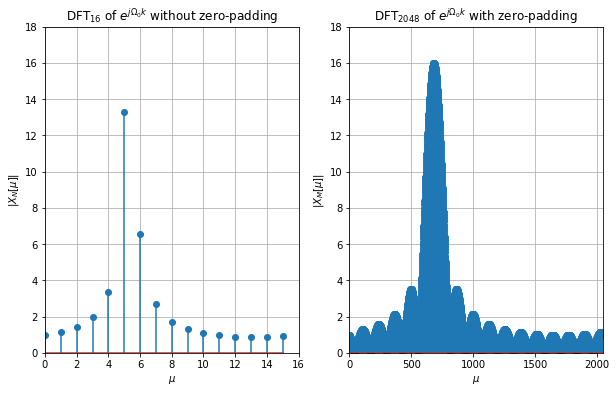

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 16  # length of the signal
M = 2048  # length of zero-padded signal
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)
# DFT of the zero-padded exponential signal
xM = np.concatenate((xN, np.zeros(M-N)))
XM = np.fft.fft(xM)


# plot spectra
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.stem(np.arange(N),np.abs(XN))
plt.title(r'DFT$_{%d}$ of $e^{j \Omega_0 k}$ without zero-padding' %N)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_N[\mu]|$')
plt.axis([0, N, 0, 18])
plt.grid()

plt.subplot(122)
plt.stem(np.arange(M),np.abs(XM))
plt.title(r'DFT$_{%d}$ of $e^{j \Omega_0 k}$ with zero-padding' %M)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_M[\mu]|$')
plt.axis([0, M, 0, 18])
plt.grid()

**Exercise**

* Check the two spectra carefully for relations. Are there common coefficients for the case $M = 2 N$?
* Increase the length `M` of the zero-padded signal $x_M[k]$. Can you gain additional information from the spectrum?


**Solution**

1. Every second (because the DFT length has been doubled) coefficient has been added, the other coefficients stay the same. With longer zero-padding, the maximum of the main lobe of the window gets closer to its true maximum. In the case $M=2N$ if we look carefully at the first plot and then compare it with the second one, we will see every of the coefficients of the first one reflected at the other figure by multiplying them by 2, so in the second plot we have the coefficients of the first one plus some coefficients added between them.
1. When M is higher, the quantity of samples increases and get closer, then the spectrum starts looking like a continuous signal where we see more clearly every lobe of it. (Now we have a Spectral Density).

### Interpolation of the Discrete Fourier Transformation

Lets step back to the discrete-time Fourier transformation (DTFT) of the finite-length signal $x_N[k]$ without zero-padding

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = -\infty}^{\infty} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k} = \sum_{k=0}^{N-1} x_N[k] \,\mathrm{e}^{-\,\mathrm{j}\,\Omega\,k}
\end{equation}

The discrete Fourier transformation (DFT) is derived by sampling $X_N(\mathrm{e}^{\mathrm{j}\,\Omega})$ at $\Omega = \mu \frac{2 \pi}{N}$

\begin{equation}
X_N[\mu] = X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \big\vert_{\Omega = \mu \frac{2 \pi}{N}} = \sum_{k=0}^{N-1} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\, \mu \frac{2\pi}{N}\,k}
\end{equation}

Since the DFT coefficients $X_N[\mu]$ are sampled equidistantly from the DTFT $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$, we can reconstruct the DTFT of $x_N[k]$ from the DFT coefficients by interpolation. Introduce the inverse DFT of $X_N[\mu]$

\begin{equation}
x_N[k] = \frac{1}{N} \sum_{\mu = 0}^{N-1} X_N[\mu] \; \mathrm{e}^{\,\mathrm{j}\,\frac{2 \pi}{N} \mu \,k}
\end{equation}

into the DTFT

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k=0}^{N-1} x_N[k] \; \mathrm{e}^{-\,\mathrm{j}\, \Omega\, k} = 
\sum_{\mu=0}^{N-1} X_N[\mu] \cdot \frac{1}{N} \sum_{k=0}^{N-1} \mathrm{e}^{-\mathrm{j}\, k \,(\Omega - \frac{2 \pi}{N} \mu)}
\end{equation}

reveals the relation between $X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $X_N[\mu]$. The last sum over $k$ constitutes a [geometric series](https://en.wikipedia.org/wiki/Geometric_series) and can be rearranged to

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\mu=0}^{N-1} X_N[\mu] \cdot \frac{1}{N} \cdot \frac{1-\mathrm{e}^{-\mathrm{j}(\Omega-\frac{2\pi}{N}\mu)N}}{1-\mathrm{e}^{-\mathrm{j}(\Omega-\frac{2\pi}{N}\mu)}}
\end{equation}

By factorizing the last fraction to

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\mu=0}^{N-1} X_N[\mu] \cdot \frac{1}{N} \cdot \frac{\mathrm{e}^{-\mathrm{j}\frac{(\Omega-\frac{2\pi}{N}\mu)N}{2}}}{\mathrm{e}^{-\mathrm{j}\frac{\Omega-\frac{2\pi}{N}\mu}{2}}} \cdot \frac{\mathrm{e}^{\mathrm{j}\frac{(\Omega-\frac{2\pi}{N}\mu)N}{2}}-\mathrm{e}^{-\mathrm{j}\frac{(\Omega-\frac{2\pi}{N}\mu)N}{2}}}{\mathrm{e}^{\mathrm{j}\frac{\Omega-\frac{2\pi}{N}\mu}{2}}-\mathrm{e}^{-\mathrm{j}\frac{\Omega-\frac{2\pi}{N}\mu}{2}}}
\end{equation}

and making use of [Euler's identity](https://en.wikipedia.org/wiki/Euler%27s_identity) $2\mathrm{j}\cdot\sin(x)=\mathrm{e}^{\mathrm{j} x}-\mathrm{e}^{-\mathrm{j} x}$ this can be simplified to

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\mu=0}^{N-1} X_N[\mu] \cdot \mathrm{e}^{-\mathrm{j}\frac{(\Omega-\frac{2\pi}{N}\mu)(N-1)}{2}} \cdot \frac{1}{N} \cdot \frac{\sin(N\frac{\Omega-\frac{2\pi}{N}\mu}{2})}{\sin(\frac{\Omega-\frac{2\pi}{N}\mu}{2})}
\end{equation}

The last fraction can be written in terms of the $N$-th order periodic sinc function (aliased sinc function, [Dirichlet kernel](https://en.wikipedia.org/wiki/Dirichlet_kernel)), which is defined as

\begin{equation}
\text{psinc}_N (\Omega) = \frac{1}{N} \frac{\sin(\frac{N}{2} \Omega)}{  \sin(\frac{1}{2} \Omega)}
\end{equation}

According to this definition, the periodic sinc function is not defined at $\Omega = 2 \pi \,n$ for $n \in \mathbb{Z}$. This is resolved by applying [L'Hôpital's rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) which results in $\text{psinc}_N (2 \pi \,n) = 1$ for $n \in \mathbb{Z}$.

Using the periodic sinc function, the DTFT $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of a finite-length signal $x_N[k]$ can be derived from its DFT $X_N[\mu]$ by

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) =  \sum_{\mu=0}^{N-1} X_N[\mu] \cdot \mathrm{e}^{-\,\mathrm{j}\, \frac{( \Omega - \frac{2 \pi}{N} \mu ) (N-1)}{2}} \cdot \text{psinc}_N ( \Omega - \frac{2 \pi}{N} \mu )
\end{equation}

#### Example - Periodic sinc function

This example illustrates the

1. periodic sinc function, and
2. interpolation of $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ from $X_N[\mu]$ for an exponential signal using above relation.

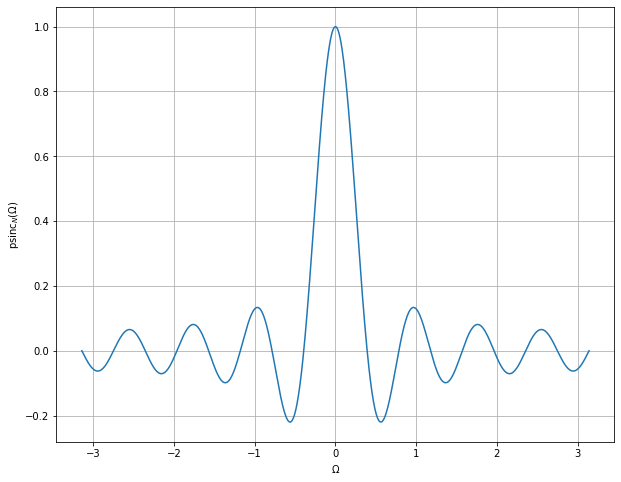

In [2]:
N = 16  # order of periodic sinc function
M = 1024  # number of frequency points
Om = np.linspace(-np.pi, np.pi, M)

# definition of periodic sinc function
def psinc(x, N):
    x = np.asanyarray(x)
    y = np.where(x == 0, 1.0e-20, x)
    return 1/N * np.sin(N/2*y)/np.sin(1/2*y)

# plot psinc
plt.figure(figsize = (10, 8))
plt.plot(Om, psinc(Om, 16))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\mathrm{psinc}_N (\Omega)$')
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


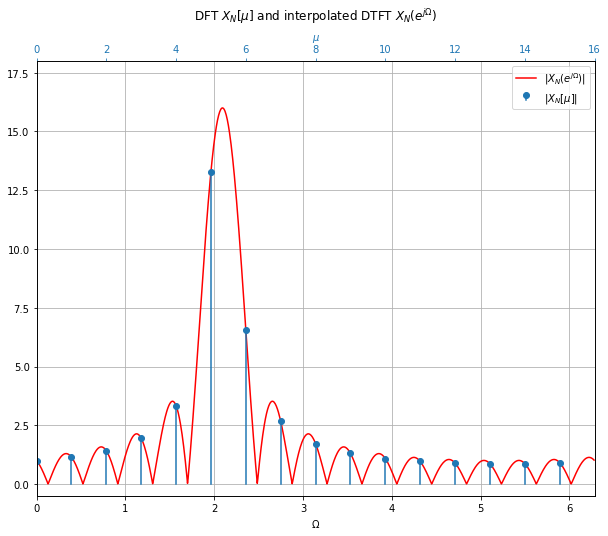

In [3]:
N = 16  # length of the signal
M = 1024  # number of frequency points for DTFT
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)

# interpolation of DTFT from DFT coefficients
Xi = np.asarray(np.zeros(M), dtype=complex)
for mu in np.arange(M):
    Omd = 2*np.pi/M*mu-2*np.pi*np.arange(N)/N
    interpolator = psinc(Omd, N) * np.exp(-1j*Omd*(N-1)/2)
    Xi[mu] = np.sum(XN * interpolator)

# plot spectra
plt.figure(figsize = (10, 8))
ax1 = plt.gca()

plt.plot(np.arange(M)*2*np.pi/M, abs(Xi), 'r', label=r'$|X_N(e^{j \Omega})|$')
plt.stem(np.arange(N)*2*np.pi/N, abs(XN), basefmt = ' ', label=r'$|X_N[\mu]|$')
plt.title(r'DFT $X_N[\mu]$ and interpolated DTFT $X_N(e^{j \Omega})$', y=1.08)
plt.ylim([-0.5, N+2]);
plt.legend()

ax1.set_xlabel(r'$\Omega$')
ax1.set_xlim([0, 2*np.pi])
ax1.grid()

ax2 = ax1.twiny()
ax2.set_xlim([0, N])
ax2.set_xlabel(r'$\mu$', color='C0')
ax2.tick_params('x', colors='C0')

### Relation between Discrete Fourier Transformations with and without Zero-Padding

It was already outlined above that the DFT is related to the DTFT by sampling. Hence, the DFT $X_M[\mu]$ is given by sampling the DTFT $X_M(\mathrm{e}^{\mathrm{j}\, \Omega})$ at $\Omega = \frac{2 \pi}{M} \mu$. Since the zero-padded signal $x_M[k]$ differs from $x_N[k]$ only with respect to the additional zeros, the DTFTs of both are equal

\begin{equation}
X_M(\mathrm{e}^{\mathrm{j}\, \Omega}) = X_N(\mathrm{e}^{\mathrm{j}\, \Omega})
\end{equation}

The desired relation between the DFTs $X_N[\mu]$ and $X_M[\mu]$ of the signal $x_N[k]$ and its zero-padded version $x_M[k]$ can be found by sampling the interpolated DTFT $X_N(\mathrm{e}^{\mathrm{j}\, \Omega})$ at $\Omega = \frac{2 \pi}{M} \mu$

\begin{equation}
X_M[\mu] =  \sum_{\eta=0}^{N-1} X_N[\eta] \cdot \mathrm{e}^{\,-\mathrm{j}\, \frac{( \frac{2 \pi}{M} \mu - \frac{2 \pi}{N} \eta ) (N-1)}{2}} \cdot \text{psinc}_N \left( \frac{2 \pi}{M} \mu - \frac{2 \pi}{N} \eta \right)
\end{equation}

for $\mu = 0, 1, \dots, M-1$.

Above equation relates the spectrum $X_N[\mu]$ of the original signal $x_N[k]$ to the spectrum $X_M[\mu]$ of the zero-padded signal $x_M[k]$. It essentially constitutes a bandlimited interpolation of the coefficients $X_N[\mu]$.

All spectral information of a signal of finite length $N$ is already contained in its spectrum derived from a DFT of length $N$. By applying zero-padding and a longer DFT, the frequency resolution is only virtually increased. The additional coefficients are related to the original ones by bandlimited interpolation. In general, zero-padding does not bring additional insights in spectral analysis. It may bring a benefit in special applications, for instance when estimating the frequency of an isolated harmonic signal from its spectrum. This is illustrated in the following example. 

Zero-padding is also used to make a circular convolution equivalent to a linear convolution. However, there is a different reasoning behind this. Details are discussed in a [later section](../nonrecursive_filters/fast_convolution.ipynb#Linear-Convolution-by-Periodic-Convolution).

#### Example - Interpolation of the DFT

The following example shows that the coefficients $X_M[\mu]$ of the spectrum of the zero-padded signal $x_M[k]$ can be derived by interpolation from the spectrum $X_N[\mu]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


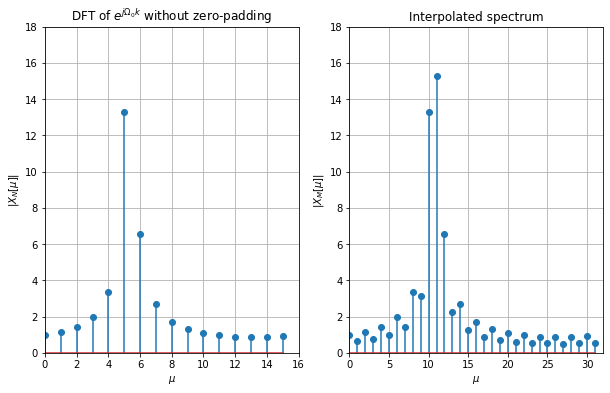

In [4]:
N = 16  # length of the signal
M = 32  # number of points for interpolated DFT
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# periodic sinc function
def psinc(x, N):
    x = np.asanyarray(x)
    y = np.where(x == 0, 1.0e-20, x)
    return 1/N * np.sin(N/2*y)/np.sin(1/2*y)

# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)

# interpolation of DFT coefficients
XM = np.asarray(np.zeros(M), dtype=complex)
for mu in np.arange(M):
    Omd = 2*np.pi/M*mu-2*np.pi*np.arange(N)/N
    interpolator = psinc(Omd, N) * np.exp(-1j*Omd*(N-1)/2)
    XM[mu] = np.sum(XN * interpolator)

# plot spectra
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.stem(np.arange(N),np.abs(XN))
plt.title(r'DFT of $e^{j \Omega_0 k}$ without zero-padding')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_N[\mu]|$')
plt.axis([0, N, 0, 18])
plt.grid()

plt.subplot(122)
plt.stem(np.arange(M),np.abs(XM))
plt.title(r'Interpolated spectrum')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_M[\mu]|$')
plt.axis([0, M, 0, 18])
plt.grid()

**Exercise**

* Compare the interpolated spectrum to the spectrum with zero padding from the first example.
* Estimate the frequency $\Omega_0$ of the exponential signal from the interpolated spectrum. How could you further increase the accuracy of your estimate?

**Solution:**

* The interpolated spectrum is the same as the spectrum with zero padding from the first example, the second one just has more samples.
* The estimated frequency from the interpolated spectrum is $\Omega_0=\frac{2\pi}{M}\mu=\frac{2\pi}{32}\cdot11$. A better estimate can be obtained by increasing the number of points for the interpolated DFT or by further zero-padding of the time domain signal.

#### Example - Estimation of Frequency and Amplitude of a Harmonic Signal

The estimation of the normalized frequency $\Omega_0$ and amplitude $A$ of a single exponential signal $x_N[k] = A \cdot e^{j \Omega_0 k}$ by the DFT of the zero-padded signal (or interpolated DFT) is illustrated in the following example. The frequency is estimated from the DFT of the zero-padded signal by finding the maximum in the magnitude spectrum

\begin{equation}
\hat{\mu_0} = \underset{\mu}{\mathrm{argmax}} \{ |X_M[\mu]| \}
\end{equation}

The amplitude is estimated by taking the magnitude at the maximum $\hat{A} = | X_M[\hat{\mu}_0] |$. 

First a function is defined which estimates the frequency for a given number of zeros appended to the signal before calculating the DFT. Without loss of generality is is assumed that $A=1$.

In [5]:
N = 128  # length of the signal
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal

# generate harmonic signal
k = np.arange(N)
x = np.exp(1j*Om0*np.arange(N))


def estimate_frequency_amplitude(x, P):
    # perform zero-padding and DFT
    xM = np.concatenate((x, np.zeros(P)))
    XM = np.fft.fft(xM)

    # estimate frequency/amplitude of harmonic signal
    mu_max = np.argmax(abs(XM))
    amplitude = 1/N * abs(XM[mu_max])

    # print results
    Om = np.fft.fftfreq(N+P, 1/(2*np.pi))
    print('Normalized frequency of signal: {0:1.4f} (real) / {1:1.4f} (estimated) / {2:1.4f} (absolute error)'.format(Om0, Om[mu_max], abs(Om0 - Om[mu_max])))
    print('Amplitude of signal: {0:1.4f} (real) / {1:1.4f} (estimated) / {2:2.2f} dB (magnitude error)'.format(1, amplitude, 20*np.log10(abs(1/amplitude))))

First the estimation is performed without zero-padding

In [6]:
estimate_frequency_amplitude(x, 0)

Normalized frequency of signal: 0.2616 (real) / 0.2454 (estimated) / 0.0162 (absolute error)
Amplitude of signal: 1.0000 (real) / 0.8303 (estimated) / 1.62 dB (magnitude error)


Then the signal is zero-padded to a total length of eight times its original length

In [7]:
estimate_frequency_amplitude(x, 7*N)

Normalized frequency of signal: 0.2616 (real) / 0.2638 (estimated) / 0.0022 (absolute error)
Amplitude of signal: 1.0000 (real) / 0.9967 (estimated) / 0.03 dB (magnitude error)


**Exercise**

* What is the maximum error that can occur when estimating the frequency from the maximum of the (zero-padded) magnitude spectrum?

**Solution:**

The maximum absolute error occurs if the maximum in the DTFT of the signal is in between two adjacent bins $\mu$ of the DFT. Since the DTFT is sampled at $\Omega = \frac{2 \pi}{M}$ to derive the DFT, the maximum absolute error is given by $\frac{\pi}{M}$ where $M$ denotes the length of the zero-padded signal/DFT.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.